In [1]:
# Importando librerias
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

/Users/haydeml/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.17.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
# separar mis datos de entrenamiento y de prueba
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)

(60000, 28, 28)


In [8]:
print(test_labels.shape)

(10000,)


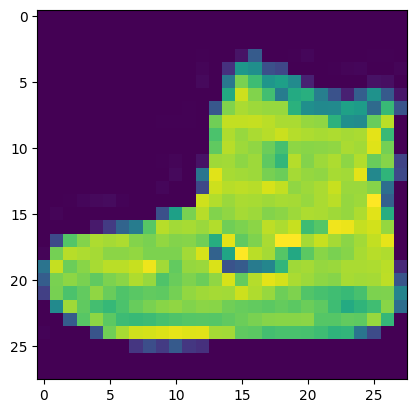

In [9]:
plt.figure()
plt.imshow(train_images[0])

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

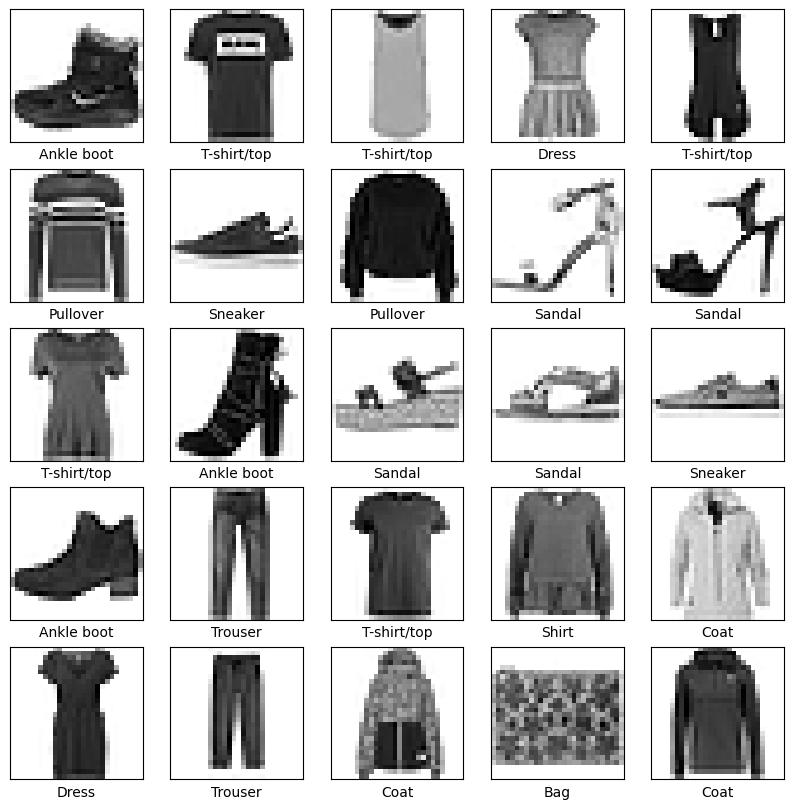

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
# Crear modelo vacio
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7857 - loss: 0.6237
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8621 - loss: 0.3832
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3382
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8880 - loss: 0.3053
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8937 - loss: 0.2894
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8980 - loss: 0.2781
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9015 - loss: 0.2673


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8752 - loss: 0.3510


In [17]:
print('Test accuracy:', test_acc)


Test accuracy: 0.875


In [18]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
[1.4137692e-06 2.3821013e-08 8.8341397e-07 1.6593350e-07 5.2640330e-06
 1.8197730e-03 1.4601223e-06 1.2072887e-02 4.0109794e-06 9.8609418e-01]
9
9


In [19]:
def plot_image(i, j, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[j], img[j]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  print(np.argmax(predictions_array), 100*np.max(predictions_array), class_names[true_label])

In [20]:
def plot_value_array(i, j, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[j]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

9 98.60941767692566 Ankle boot


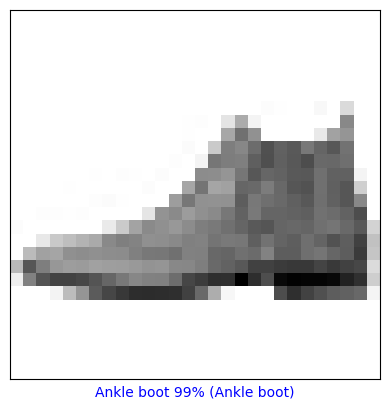

In [21]:
i = 0
plot_image(i, i, predictions, test_labels, test_images)

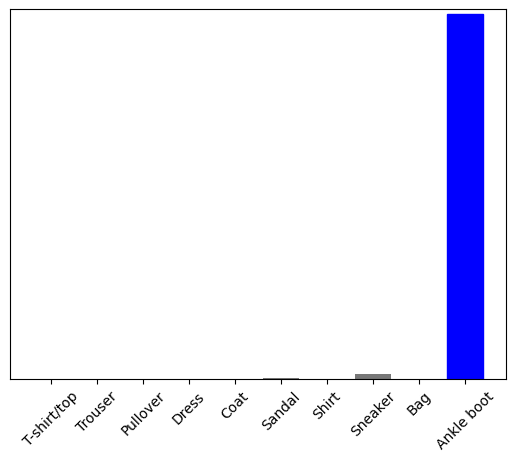

In [22]:
i = 0
plot_value_array(i, i, predictions,  test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


7 60.66411733627319 Sneaker


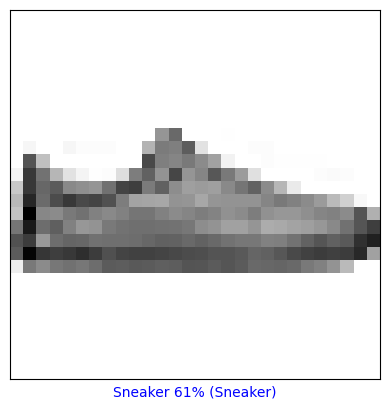

In [23]:
i = 12
plot_image(i, i, predictions, test_labels, test_images)

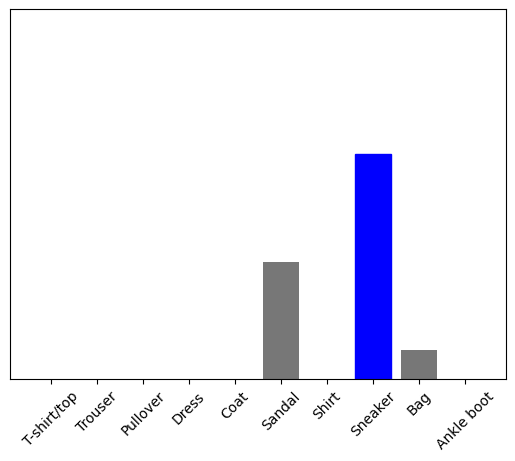

In [24]:
plot_value_array(i,i, predictions,  test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
# Grab an image from the test dataset
img = test_images[25]

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[2.6913469e-03 5.0530080e-06 5.7234639e-01 2.7066416e-03 1.2654810e-01
  2.1702165e-06 2.9561666e-01 8.3770306e-07 8.1425511e-05 1.3999417e-06]]


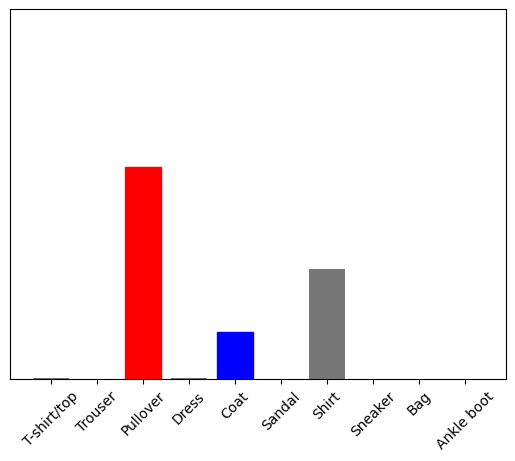

In [28]:
plot_value_array(0,25, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

2 57.234638929367065 Coat


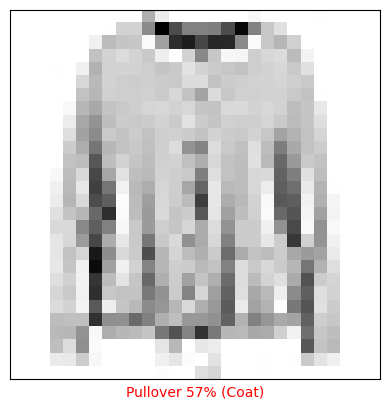

In [29]:
plot_image(0, 25, predictions_single, test_labels, test_images)

In [30]:
np.argmax(predictions_single)

2

In [31]:
predictions_single[0]

array([2.6913469e-03, 5.0530080e-06, 5.7234639e-01, 2.7066416e-03,
       1.2654810e-01, 2.1702165e-06, 2.9561666e-01, 8.3770306e-07,
       8.1425511e-05, 1.3999417e-06], dtype=float32)

In [32]:
test_labels[25]

4